In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dataset = pd.read_csv("bengaluru.csv")
dataset.head(3)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4


In [3]:
dataset.shape

(96432, 25)

In [4]:
dataset.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,29.646093,19.336735,0.0,10.653484,5.900448,4.013751,46.094077,16.085418,25.002261,25.269662,24.422152,17.370966,34.847488,64.895460,0.077719,1010.554225,23.979810,9.274162,176.182097,12.448938
std,3.446427,2.773771,0.0,1.986738,0.851346,2.869923,31.249725,4.161604,4.586926,4.430811,4.516766,7.426413,28.391021,21.856869,0.385865,3.187016,4.540028,2.184726,89.443207,5.716769
min,18.000000,11.000000,0.0,4.200000,4.000000,1.000000,0.000000,-9.000000,12.000000,13.000000,12.000000,0.000000,0.000000,6.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,18.000000,0.0,8.800000,5.000000,1.000000,18.000000,14.000000,21.000000,22.000000,21.000000,12.000000,9.000000,49.000000,0.000000,1008.000000,21.000000,10.000000,94.000000,8.000000
50%,29.000000,20.000000,0.0,11.600000,6.000000,5.000000,46.000000,18.000000,25.000000,25.000000,24.000000,17.000000,29.000000,68.000000,0.000000,1010.000000,23.000000,10.000000,163.000000,12.000000
75%,32.000000,21.000000,0.0,11.600000,6.000000,7.000000,73.000000,19.000000,28.000000,28.000000,27.000000,22.000000,54.000000,83.000000,0.000000,1013.000000,27.000000,10.000000,262.000000,16.000000
max,40.000000,28.000000,0.0,12.900000,8.000000,10.000000,100.000000,25.000000,43.000000,43.000000,42.000000,53.000000,100.000000,100.000000,16.900000,1021.000000,40.000000,20.000000,360.000000,41.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [6]:
# sns.pairplot(data=dataset)
# plt.show()

***droping useless feature***

In [7]:
dataset = dataset.drop(['totalSnow_cm', 'date_time'], axis=1)  # ['income', 'expenses']

***deleting duplicate row***

In [8]:
dataset.drop_duplicates(inplace=True)

***null value***

In [9]:
dataset.isnull().sum()

maxtempC             0
mintempC             0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

# encoding

In [10]:
object_data = dataset.select_dtypes(include=['object'])
object_data

,moonrise,moonset,sunrise,sunset
0,09:58 AM,10:03 PM,06:42 AM,06:05 PM
1,09:58 AM,10:03 PM,06:42 AM,06:05 PM
2,09:58 AM,10:03 PM,06:42 AM,06:05 PM
3,09:58 AM,10:03 PM,06:42 AM,06:05 PM
4,09:58 AM,10:03 PM,06:42 AM,06:05 PM
...,...,...,...,...
96427,11:15 AM,11:19 PM,06:41 AM,06:04 PM
96428,11:15 AM,11:19 PM,06:41 AM,06:04 PM
96429,11:15 AM,11:19 PM,06:41 AM,06:04 PM
96430,11:15 AM,11:19 PM,06:41 AM,06:04 PM


In [11]:
dataset["moonrise"].value_counts()

moonrise
No moonrise    3264
04:53 AM        192
09:23 AM        192
08:17 PM        192
12:09 PM        192
               ... 
04:04 PM         24
02:14 AM         24
01:14 PM         24
07:25 AM         24
11:15 AM         24
Name: count, Length: 1348, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
    
for column in dataset.select_dtypes(include=['object']).columns:
    dataset[column] = le.fit_transform(dataset[column])

In [13]:
# if want to convert int32 to int64

# dataset = dataset.astype({col: 'int64' for col in dataset.select_dtypes(include='int32').columns})

# scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = dataset.select_dtypes(include=['float64', 'int64', 'int32']).columns

dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

In [15]:
dataset.head(5)

,maxtempC,mintempC,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,-0.767931,-2.644924,0.476319,-1.057772,-1.050283,-0.483005,0.751832,0.790491,1.562082,-0.968222,...,-1.422026,-0.857826,-1.156957,1.194514,-0.201433,1.081225,-2.198338,0.332199,-0.751155,-0.778209
1,-0.767931,-2.644924,0.476319,-1.057772,-1.050283,-0.483005,0.751832,0.790491,1.562082,-0.968222,...,-1.643426,-1.127159,-1.156957,1.286021,-0.201433,1.081225,-2.198338,-1.041387,-1.019483,-1.128083
2,-0.767931,-2.644924,0.476319,-1.057772,-1.050283,-0.483005,0.751832,0.790491,1.562082,-0.968222,...,-1.864827,-1.396492,-1.156957,1.331774,-0.201433,1.081225,-2.418601,-1.957112,-1.287811,-1.477957
3,-0.767931,-2.644924,0.476319,-1.057772,-1.050283,-0.483005,0.751832,0.790491,1.562082,-0.968222,...,-2.086227,-1.665825,-1.156957,1.423281,-0.201433,1.081225,-2.638864,-3.330698,-1.556140,-1.652894
4,-0.767931,-2.644924,0.476319,-1.057772,-1.050283,-0.483005,0.751832,0.790491,1.562082,-0.968222,...,-1.422026,-1.665825,-1.192183,1.057253,-0.201433,1.394999,-2.198338,-1.957112,-1.466697,-1.652894


# Outlier

In [16]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset = dataset[~((dataset < lower_bound) | (dataset > upper_bound)).any(axis=1)]

In [17]:
dataset.shape

# (96432, 25) previus shape of dataset

(63703, 23)

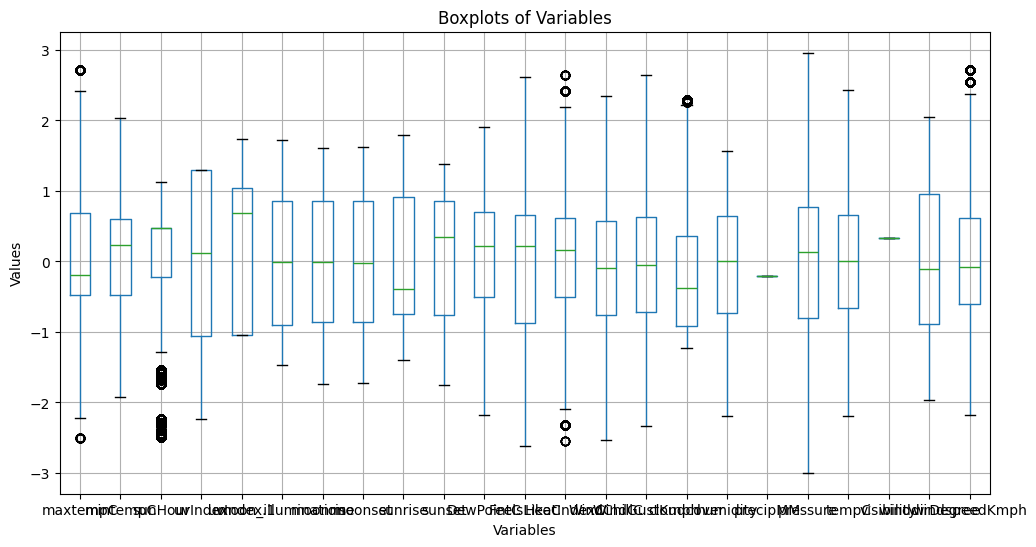

In [18]:
#finding outliers
fig, ax = plt.subplots(figsize=(12, 6))
dataset.boxplot(ax=ax)

# Customize the plot
ax.set_title('Boxplots of Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
plt.show()

# feature selection

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

a = dataset.drop(columns=['maxtempC'])  # Drop the target column
b = dataset['maxtempC']

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=42)

model = LinearRegression()

In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector

fs = SequentialFeatureSelector(model, k_features=8,forward=True) # change feature for getting accuracy value 
fs.fit(a,b)

selected_features = fs.k_feature_names_
print(f"Selected features: {selected_features}")

selected_indices = fs.k_feature_idx_
print(f"Selected feature indices: {selected_indices}")


Selected features: ('mintempC', 'sunHour', 'uvIndex', 'uvIndex.1', 'WindChillC', 'WindGustKmph', 'tempC', 'windspeedKmph')
Selected feature indices: (0, 1, 2, 3, 12, 13, 18, 21)


In [21]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=model, n_features_to_select=9)

rfe.fit(a_train, b_train)

selected_features = a_train.columns[rfe.support_]

selected_features


Index(['mintempC', 'sunHour', 'uvIndex', 'uvIndex.1', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'tempC', 'windspeedKmph'],
      dtype='object')

# find corelation between features 

In [22]:
correlation_matrix = dataset.corr()

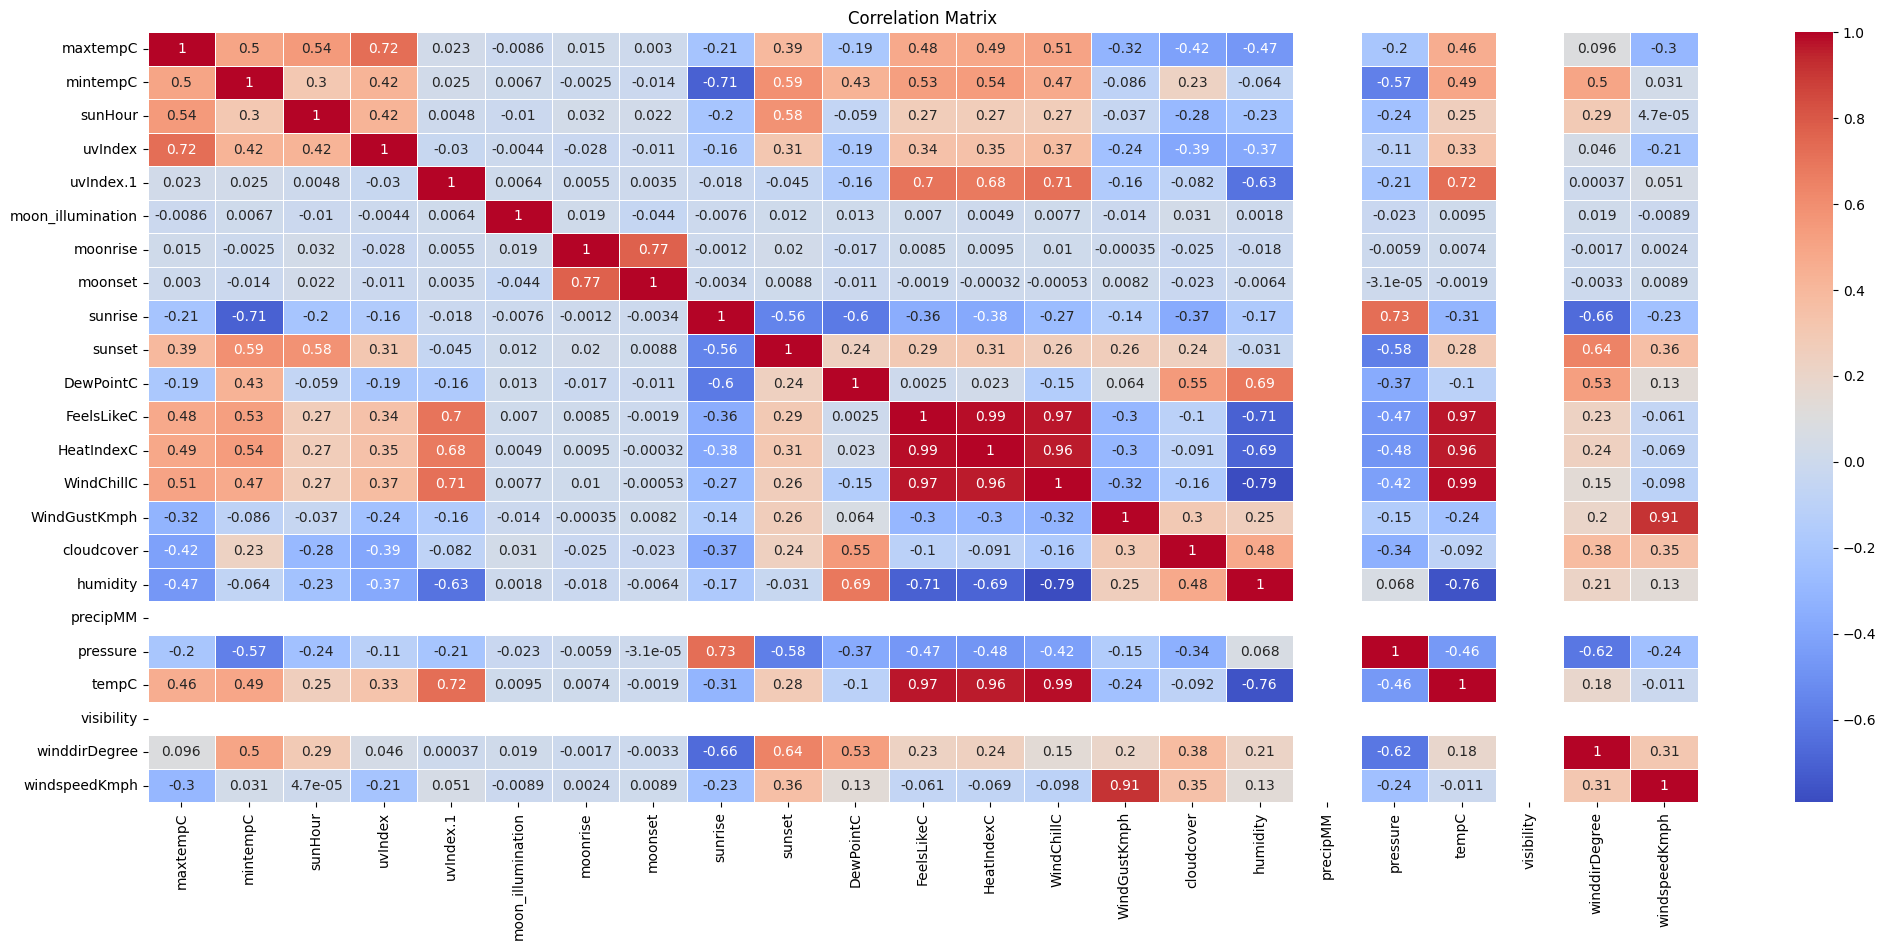

In [23]:
#  Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# breakdown dataset

In [51]:
# x = dataset.drop(columns=['maxtempC', 'windspeedKmph'])
# y = dataset[['maxtempC', 'windspeedKmph']]

# x = dataset.drop(columns=['windspeedKmph'])
# y = dataset['windspeedKmph']

x = dataset.drop(columns=['maxtempC'])
y = dataset['maxtempC']

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.34610828855139203
RMSE: 0.44691158252158675
R² Score: 0.7662502145431852


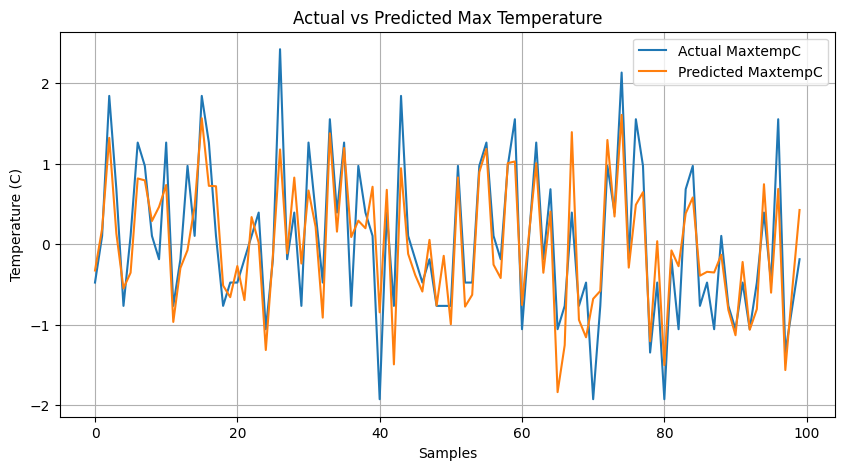

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual MaxtempC')
plt.plot(y_pred[:100], label='Predicted MaxtempC')
plt.legend()
plt.title("Actual vs Predicted Max Temperature")
plt.xlabel("Samples")
plt.ylabel("Temperature (C)")
plt.grid()
plt.show()


# model


***LinearRegression***

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

lr.score(x_test, y_test)*100, lr.score(x_train, y_train)*100, lr.score(x, y)*100

# (78.23573622220769, 78.45570384679002) 

(76.62502145431851, 76.37121208905047, 76.4349399623645)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

train_predictions = lr.predict(x_train)
test_predictions = lr.predict(x_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training MSE: {train_mse:.2f}, R^2: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.2f}, R^2: {test_r2:.4f}")

Training MSE: 0.20, R^2: 0.7637
Testing MSE: 0.20, R^2: 0.7663


***KNeighborsRegressor***

In [60]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=4)
knr.fit(x_train, y_train)

knr.score(x_test, y_test)*100 , knr.score(x_train, y_train)*100


(93.25449590856316, 96.57744154275746)

***MLPRegressor***

In [33]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(solver='adam', alpha=0.001, hidden_layer_sizes=(7, 5,), random_state=10)

mlp.fit(x_train, y_train)

mlp.score(x_test, y_test)*100, mlp.score(x_train, y_train)*100

(87.21553489600117, 87.32840379724973)

***RandomForestRegressor***

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=10)
rfc.fit(x_train, y_train)

rfc.score(x_test, y_test)*100  , rfc.score(x_train, y_train)*100

(93.63790385955055, 98.76258773434114)

***VotingRegressor***

In [35]:
# from sklearn.ensemble import VotingRegressor

# li = [("lr1", LinearRegression()), (("rf1"), RandomForestRegressor()), (("mlp1"), MLPRegressor())]

# vr = VotingRegressor(li)
# vr.fit(x_train, y_train)

# vr.score(x_test, y_test)*100  , vr.score(x_train, y_train)*100

***DecisionTreeRegressor***

In [36]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

dt.score(x_test, y_test)*100 , dt.score(x_train, y_train)*100

(87.90276924099278, 100.0)

In [37]:
# plt.figure(figsize=(12, 8))

# plot_tree(pd)
# plt.show()

***SVR***

In [38]:
# from sklearn.svm import SVR

# sr = SVR(kernel="linear")
# sr.fit(x_train, y_train)

# sr.score(x_test, y_test)*100, sr.score(x_train, y_train)*100

# evaluation metrics

**lr**

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)*100
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)*100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 29.64
Mean Squared Error (MSE): 14.91
Root Mean Squared Error (RMSE): 3.86
R² Score: 82.66


# prediction

In [40]:
dataset.shape

(63703, 23)

In [41]:
dataset.columns.tolist()

['maxtempC',
 'mintempC',
 'sunHour',
 'uvIndex',
 'uvIndex.1',
 'moon_illumination',
 'moonrise',
 'moonset',
 'sunrise',
 'sunset',
 'DewPointC',
 'FeelsLikeC',
 'HeatIndexC',
 'WindChillC',
 'WindGustKmph',
 'cloudcover',
 'humidity',
 'precipMM',
 'pressure',
 'tempC',
 'visibility',
 'winddirDegree',
 'windspeedKmph']

In [42]:
dataset.reset_index(drop=True, inplace=True)

columns_of_interest = ['sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC']

# Get the first row values for the specified columns
first_row_values = dataset.loc [0][columns_of_interest]

print(first_row_values)

sunset       -0.968222
DewPointC    -0.020496
FeelsLikeC   -1.526796
HeatIndexC   -1.640969
Name: 0, dtype: float64


In [43]:
new_data = pd.DataFrame({
    'mintempC': [-0.767782],       
    'sunHour': [-1.202966],
    'uvIndex': [0.476419],
    'uvIndex.1': [-1.057681],
    'moon_illumination': [0.343652],
    'moonrise': [-0.259014],
    'moonset': [0.925991],
    'sunrise': [1.01614],
    'sunset' : [-0.968057],
    'DewPointC' : [-0.020525],
    'FeelsLikeC' : [-1.526577],
    'HeatIndexC' : [-1.640715],
    'WindChillC': [-1.421855],
    'WindGustKmph': [-1.531160],
    'cloudcover': [0.040594],
    'humidity': [0.919832],
    'precipMM': [-0.201416],
    'pressure': [1.708747],
    'tempC': [-1.317137],
    'visibility': [0.332235],
    'winddirDegree': [-0.672856]
    # 'windspeedKmph': [-1.303005],
})
predicted_max_temp = mlp.predict(new_data)   # lr, rfc, mlp, knr, dt

predicted_value = predicted_max_temp[0][0].item()
predicted_value1 = predicted_max_temp[0][1].item()


print(f"Predicted Maximum Temperature: {predicted_value:.2f} °C")
print(f"wind speed: {predicted_value1:.2f} Kmph")

Predicted Maximum Temperature: -0.54 °C
wind speed: -1.42 Kmph


In [44]:
dataset.head(4)

,maxtempC,mintempC,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,-0.767931,-1.202924,0.476319,-1.057772,0.343498,-0.259007,0.925984,1.01616,1.562082,-0.968222,...,-1.422026,-1.531159,0.040724,0.919993,-0.201433,1.708774,-1.317285,0.332199,-0.672892,-1.303020
1,-0.767931,-1.202924,0.476319,-1.057772,0.691943,-0.259007,0.925984,1.01616,1.562082,-0.968222,...,-0.757825,-1.531159,-0.311535,0.279445,-0.201433,1.708774,-0.876758,0.332199,-0.795876,-1.303020
2,-0.767931,-1.202924,0.476319,-1.057772,0.691943,-0.259007,0.925984,1.01616,1.562082,-0.968222,...,-0.093625,-1.396492,-0.663794,-0.361103,-0.201433,1.708774,-0.215968,0.332199,-0.918860,-1.128083
3,-0.767931,-1.202924,0.476319,-1.057772,1.040388,-0.259007,0.925984,1.01616,1.562082,-0.968222,...,0.570576,-1.396492,-0.980827,-1.001650,-0.201433,1.394999,0.444821,0.332199,-1.041844,-1.128083
